In [1]:
import zipfile
import os


In [2]:
zip_file_path = 'Dataset Brain Tumor.zip'  # Replace with your file's name
extract_dir = 'Dataset Brain Tumor'  # Replace with the desired extraction directory


In [3]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['Dataset Brain Tumor', 'vi.py']


In [ ]:
# For the latest versions:
!pip install tensorflow==2.13.0 tensorflow-addons==0.21.0


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 6.5 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.3 MB/s eta 0:00:00a 0:00:01


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  You can safely remove it manually.
  You can safely remove it manually.
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Successfully uninstalled gast-0.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensor

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from vit_keras import vit
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]  # Added brightness range
)

2024-10-07 01:06:39.122839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 01:06:41.354476: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 01:06:42.264952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
202

In [3]:
# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    'Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(224, 224),  # Change to 224x224
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(224, 224),  # Change to 224x224
    batch_size=32,
    class_mode='categorical'
)

# Load ViT model
vit_model = vit.vit_b32(
    image_size=224,
    pretrained=True,
    include_top=True,  # Ensure include_top is True
)

Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


2024-10-07 01:07:01.631174: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /nfsshare/achuthan/.local/lib/python3.9/site-packages/cv2/../../lib64:/opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
2024-10-07 01:07:01.631964: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /nfsshare/achuthan/.local/lib/python3.9/site-packages/cv2/../../lib64:/opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
2024-10-07 01:07:01.632862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.1

In [7]:
!pip install tensorflow-gpu


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 4.5 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobu

In [4]:
# Create a new model with ViT base
input_layer = Input(shape=(224, 224, 3))
vit_output = vit_model(input_layer)

# Use the ViT output for classification
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(vit_output)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    #callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/30
179/179 [==============================] - 368s 2s/step - loss: 1.5481 - accuracy: 0.7885 - val_loss: 1.1744 - val_accuracy: 0.9332
Epoch 2/30
179/179 [==============================] - 336s 2s/step - loss: 1.2199 - accuracy: 0.9017 - val_loss: 1.0829 - val_accuracy: 0.9513
Epoch 3/30
179/179 [==============================] - 335s 2s/step - loss: 1.1110 - accuracy: 0.9327 - val_loss: 1.0158 - val_accuracy: 0.9513
Epoch 4/30
179/179 [==============================] - 336s 2s/step - loss: 1.0251 - accuracy: 0.9418 - val_loss: 0.9308 - val_accuracy: 0.9678
Epoch 5/30
179/179 [==============================] - 335s 2s/step - loss: 0.9498 - accuracy: 0.9487 - val_loss: 0.9352 - val_accuracy: 0.9560
Epoch 6/30
179/179 [==============================] - 336s 2s/step - loss: 0.8990 - accuracy: 0.9587 - val_loss: 0.8432 - val_accuracy: 0.9686
Epoch 7/30
179/179 [==============================] - 335s 2s/step - loss: 0.8367 - accuracy: 0.9590 - val_loss: 0.8008 - val_accuracy: 0.9717

In [10]:
# Evaluate the model on the test set
evaluation = model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")
# Save the trained model
model.save('my_trained_model.keras')  # Save in Keras format

# or as .h5
model.save('my_trained_model.h5')



40/40 [==============================] - 21s 530ms/step - loss: 0.1552 - accuracy: 0.9772
Test Loss: 0.1552470624446869, Test Accuracy: 0.9772191643714905


In [11]:
# Predictions
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

40/40 [==============================] - 24s 516ms/step


In [12]:
# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report:\n", report)


Classification Report:
 {'glioma': {'precision': 0.18181818181818182, 'recall': 0.16793893129770993, 'f1-score': 0.1746031746031746, 'support': 262.0}, 'meningioma': {'precision': 0.23076923076923078, 'recall': 0.23529411764705882, 'f1-score': 0.23300970873786409, 'support': 306.0}, 'notumor': {'precision': 0.30295566502463056, 'recall': 0.3037037037037037, 'f1-score': 0.3033292231812577, 'support': 405.0}, 'pituitary': {'precision': 0.22364217252396165, 'recall': 0.23333333333333334, 'f1-score': 0.22838499184339314, 'support': 300.0}, 'accuracy': 0.24273369992144542, 'macro avg': {'precision': 0.2347963125340012, 'recall': 0.23506752149545146, 'f1-score': 0.23483177459142238, 'support': 1273.0}, 'weighted avg': {'precision': 0.2419807104037016, 'recall': 0.24273369992144542, 'f1-score': 0.24227088418008283, 'support': 1273.0}}


In [13]:
# Generate AUC Scores
y_true_bin = tf.keras.utils.to_categorical(y_true, num_classes=len(class_labels))
auc_scores = roc_auc_score(y_true_bin, predictions, multi_class='ovo')

# Print AUC scores
print("\nAUC Scores per class:")
auc_score_dict = {}
for i, class_label in enumerate(class_labels):
    auc_score_dict[class_label] = roc_auc_score(y_true_bin[:, i], predictions[:, i])
    print(f"{class_label}: {auc_score_dict[class_label]}")



AUC Scores per class:
glioma: 0.49110169811463217
meningioma: 0.49868537556353115
notumor: 0.48271889400921664
pituitary: 0.5077355258650222


In [15]:
# Create DataFrame for Classification Report
import pandas as pd
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report DataFrame:\n", report_df)

# Create DataFrame for AUC Scores
auc_df = pd.DataFrame(auc_score_dict.items(), columns=['Class', 'AUC Score'])
print("\nAUC Scores DataFrame:\n", auc_df)



Classification Report DataFrame:
               precision    recall  f1-score      support
glioma         0.181818  0.167939  0.174603   262.000000
meningioma     0.230769  0.235294  0.233010   306.000000
notumor        0.302956  0.303704  0.303329   405.000000
pituitary      0.223642  0.233333  0.228385   300.000000
accuracy       0.242734  0.242734  0.242734     0.242734
macro avg      0.234796  0.235068  0.234832  1273.000000
weighted avg   0.241981  0.242734  0.242271  1273.000000

AUC Scores DataFrame:
         Class  AUC Score
0      glioma   0.491102
1  meningioma   0.498685
2     notumor   0.482719
3   pituitary   0.507736


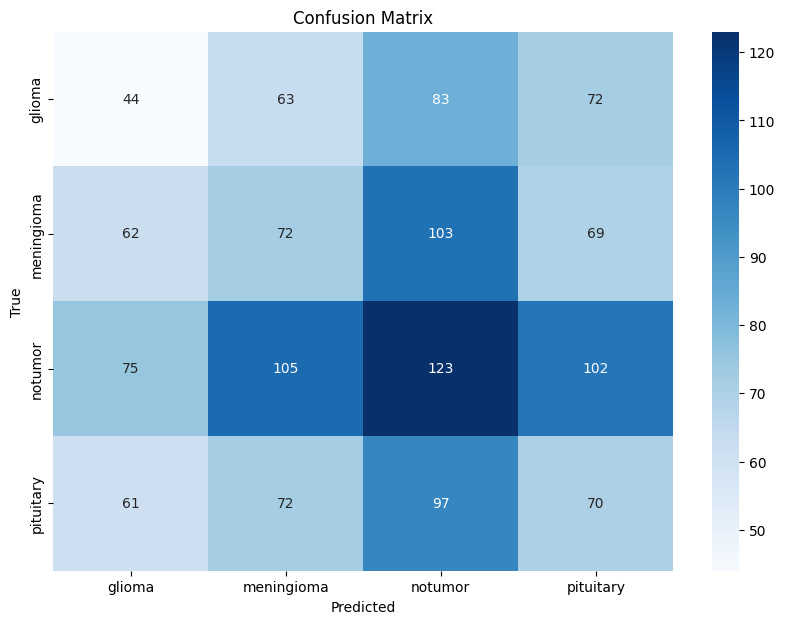

In [16]:
# Visualization of Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


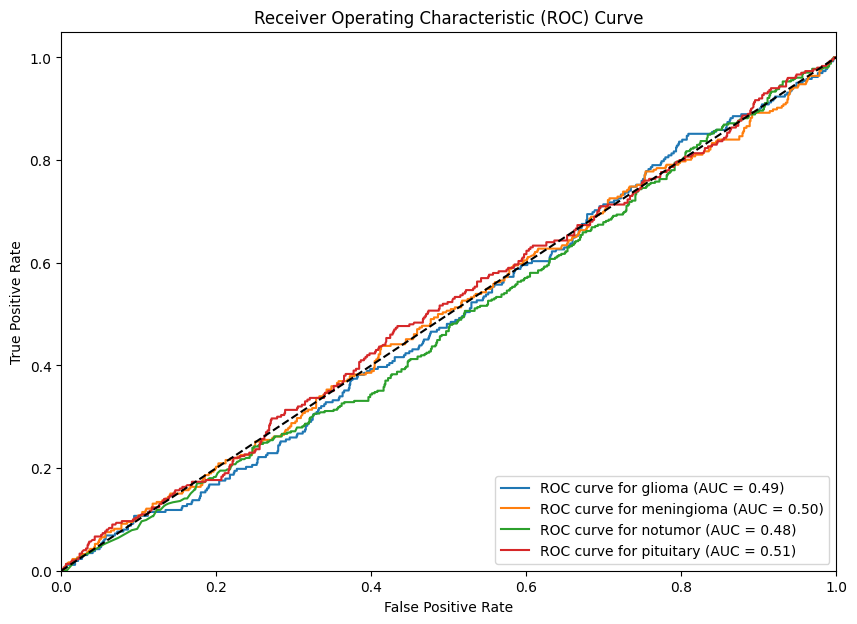

In [18]:
# ROC Curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_labels[i]} (AUC = {auc_score_dict[class_labels[i]]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

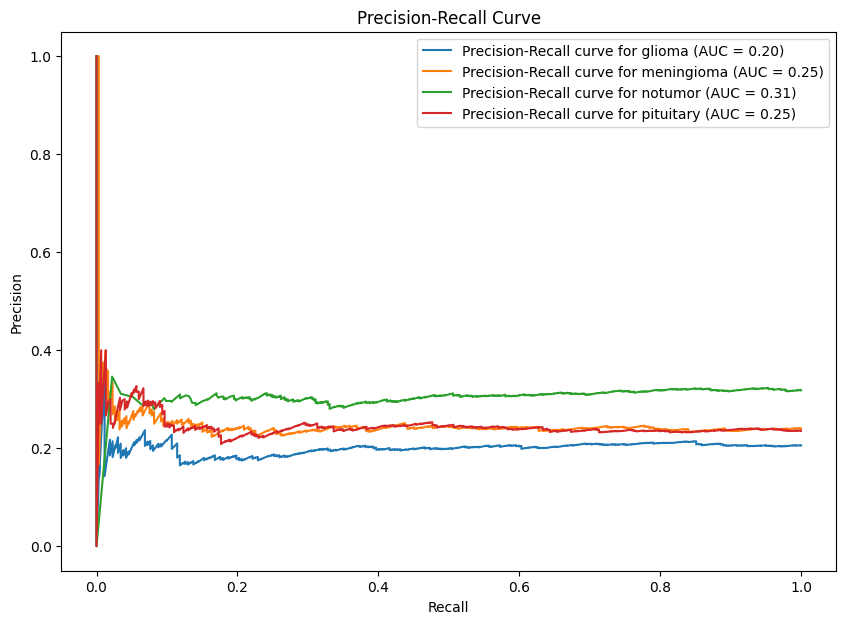

In [20]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], predictions[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve for {class_labels[i]} (AUC = {average_precision_score(y_true_bin[:, i], predictions[:, i]):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

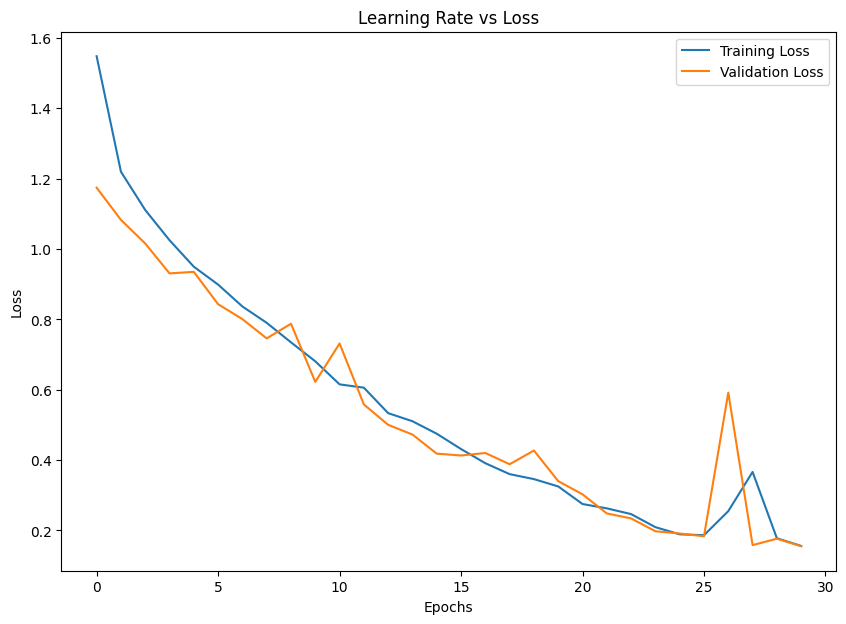

In [21]:
# Learning Rate vs Loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.legend()
plt.show()

In [24]:
# Class-wise Accuracy Bar Plot
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.bar(target_names, accuracy_per_class)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()


NameError: name 'cm' is not defined

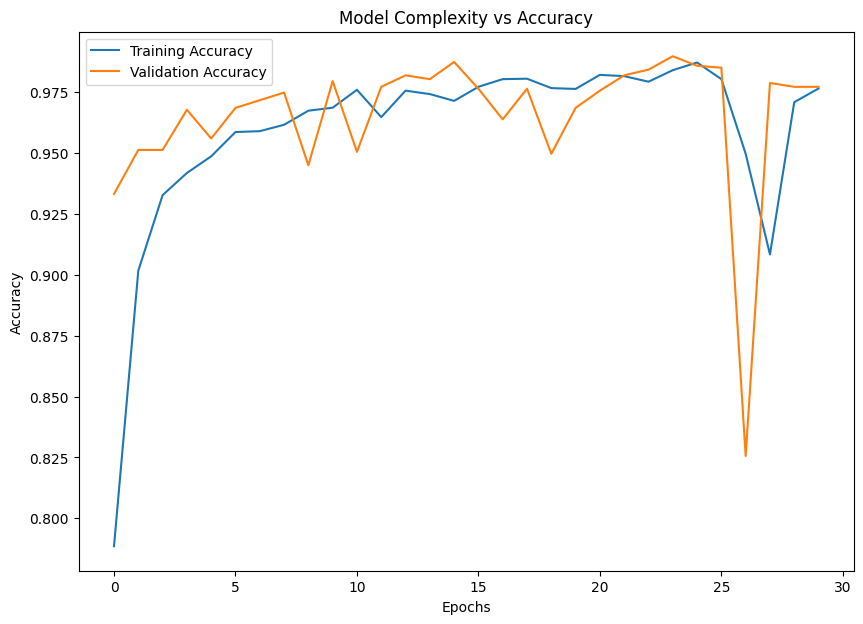

In [25]:
# Model Complexity vs Accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Complexity vs Accuracy')
plt.legend()
plt.show()

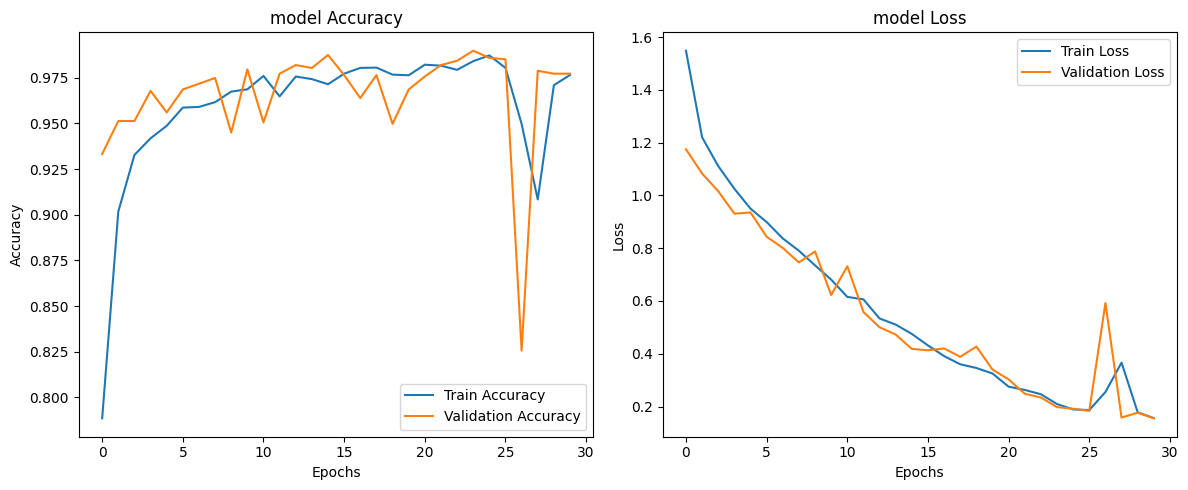

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model training
# Example: history_vit = model_vit.fit(...) and history_efficientnet = model_efficientnet.fit(...)

def plot_training_history(history, model_name=model):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function for each model
plot_training_history(history, "model")

